<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/03_evalutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


====== THRESHOLD ANALYSIS ======


=== Threshold = 0.5 ===
Predicted Frauds: 0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[981   0]
 [101   0]]

=== Threshold = 0.3 ===
Predicted Frauds: 144
Precision: 0.13194444444444445
Recall: 0.18811881188118812
F1 Score: 0.15510204081632653
Confusion Matrix:
 [[856 125]
 [ 82  19]]

=== Threshold = 0.25 ===
Predicted Frauds: 238
Precision: 0.18487394957983194
Recall: 0.43564356435643564
F1 Score: 0.25958702064896755
Confusion Matrix:
 [[787 194]
 [ 57  44]]

=== Threshold = 0.22 ===
Predicted Frauds: 391
Precision: 0.15601023017902813
Recall: 0.6039603960396039
F1 Score: 0.24796747967479674
Confusion Matrix:
 [[651 330]
 [ 40  61]]

=== Threshold = 0.2 ===
Predicted Frauds: 711
Precision: 0.11533052039381153
Recall: 0.8118811881188119
F1 Score: 0.2019704433497537
Confusion Matrix:
 [[352 629]
 [ 19  82]]

=== Threshold = 0.18 ===
Predicted Frauds: 1072
Precision: 0.08768656716417911
Recall: 0.9306930693069307
F1 Score: 0.1602728

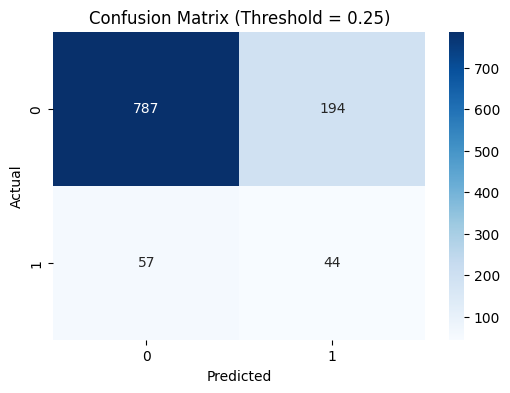

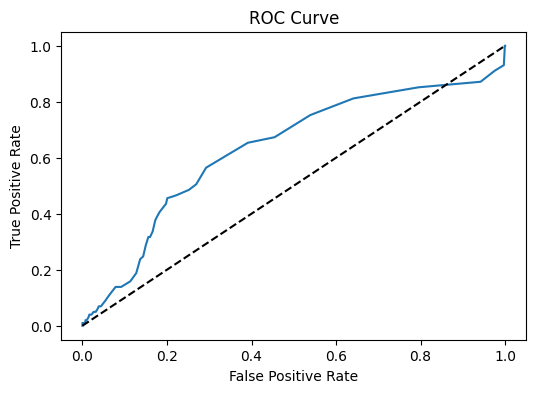

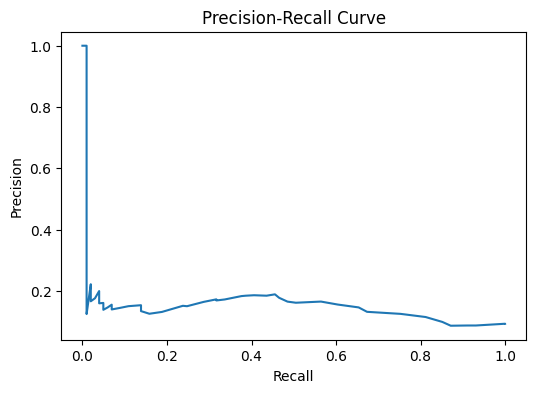


False Positives (top 3):


,TotalClaims,UniquePatients,TotalReimbursed,AvgReimbursed,StdReimbursed,MaxReimbursed,MinReimbursed,TotalDeductible,AvgDeductible,InpatientClaims,...,ObstrPulmonary_Rate,Depression_Rate,Diabetes_Rate,IschemicHeart_Rate,Osteoporasis_Rate,rheumatoidarthritis_Rate,stroke_Rate,y_true,y_proba,y_pred
8,-0.281848,-0.310630,0.467186,2.058086,2.276963,2.307016,-0.162704,0.688309,2.813004,0.722160,...,-0.247253,0.023767,0.544080,0.482272,0.215915,0.789688,0.490865,0,0.320,1
15,-0.343566,-0.415468,-0.056040,2.234662,2.487240,1.363494,0.338073,0.072651,2.957471,0.074395,...,0.674617,1.269074,-0.238268,0.801631,0.063325,0.150794,1.040189,0,0.335,1
18,-0.351281,-0.430445,-0.152292,1.981305,0.601108,0.262718,1.339629,-0.015301,2.957471,-0.011973,...,2.187338,0.745835,0.879372,1.527448,0.608289,-0.990087,0.339521,0,0.315,1



False Negatives (top 3):


,TotalClaims,UniquePatients,TotalReimbursed,AvgReimbursed,StdReimbursed,MaxReimbursed,MinReimbursed,TotalDeductible,AvgDeductible,InpatientClaims,...,ObstrPulmonary_Rate,Depression_Rate,Diabetes_Rate,IschemicHeart_Rate,Osteoporasis_Rate,rheumatoidarthritis_Rate,stroke_Rate,y_true,y_proba,y_pred
13,0.119319,0.445702,2.740888,1.319326,1.294332,2.307016,-0.162704,3.912528,2.099292,3.874614,...,0.312475,0.119166,0.171100,-0.092981,0.107683,0.661538,0.515503,1,0.215,0
16,1.137666,2.295347,3.325061,0.205063,1.268156,3.145703,-0.162704,3.188825,0.194834,3.097297,...,0.037468,0.094783,0.224572,0.280816,0.165246,0.242239,-0.045579,1,0.200,0
29,0.092318,0.258491,2.209423,1.095705,1.776723,2.307016,-0.162704,2.495427,1.326841,2.492716,...,-0.070803,0.038177,-0.158109,-0.293044,0.032057,0.118064,0.742692,1,0.180,0


In [25]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve
)


# 1. Load model and scaler

model = joblib.load("final_model.pkl")
scaler = joblib.load("scaler.pkl")


# 2. Load TEST data (processed)

X_test = pd.read_csv("test_processed.csv")
y_test = pd.read_csv("y_test.csv")["Fraud"]


# 3. Scale test features

X_test_scaled = scaler.transform(X_test)


# 4. Make predictions

y_pred_default = model.predict(X_test_scaled)              # default (0.5)
y_proba = model.predict_proba(X_test_scaled)[:, 1]         # probabilities


# 5. Threshold evaluation loop

thresholds = [0.50, 0.30, 0.25, 0.22, 0.20, 0.18]

print("\n====== THRESHOLD ANALYSIS ======\n")

for t in thresholds:
    preds = (y_proba >= t).astype(int)

    print(f"\n=== Threshold = {t} ===")
    print("Predicted Frauds:", preds.sum())
    print("Precision:", precision_score(y_test, preds, zero_division=0))
    print("Recall:", recall_score(y_test, preds, zero_division=0))
    print("F1 Score:", f1_score(y_test, preds, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


# Choose which threshold to analyze FP/FN and confusion matrix

best_threshold = 0.25
y_pred_best = (y_proba >= best_threshold).astype(int)


# Confusion matrix for chosen threshold

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {best_threshold})")
plt.show()


# 6. ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


# 7. Precision–Recall Curve

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


# 8. False Positives & False Negatives

test_df = X_test.copy()
test_df["y_true"] = y_test
test_df["y_proba"] = y_proba
test_df["y_pred"] = y_pred_best

false_positives = test_df[(test_df["y_true"] == 0) & (test_df["y_pred"] == 1)]
false_negatives = test_df[(test_df["y_true"] == 1) & (test_df["y_pred"] == 0)]

print("\nFalse Positives (top 3):")
display(false_positives.head(3))

print("\nFalse Negatives (top 3):")
display(false_negatives.head(3))
